In [1]:
#importing the libreries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'sklearn.svc'

In [5]:
#loading the dataset as pandas dataframe

in_data = pd.read_csv(r"C:\Users\renji\OneDrive\Desktop\Studies\ML\ML assignment\CE802_P2_Data\CE802_P2_Data.csv")
in_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,NaN,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,7.22,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,7.69,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,NaN,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,30,266.88,-18.69,-17.30,14.70,383.22,-4.94,-3.05,-9.78,5.95,-14.20,20.89,-9.29,110,9.38,True
1496,30,206.88,-22.35,-18.00,12.30,428.22,-3.27,-3.48,-8.46,9.20,-11.56,30.89,-8.44,260,6.52,False
1497,30,106.88,-17.91,-17.48,13.50,623.22,-5.96,-2.59,-13.89,9.40,-7.06,20.89,-11.79,370,NaN,True
1498,30,336.88,-23.73,-18.68,17.60,503.22,-5.01,-3.72,-7.98,6.50,-8.60,30.89,-8.04,250,NaN,False


In [6]:
#counting the no of points in each class

in_data['Class'].value_counts()

#the data set is almost balanced 

False    809
True     691
Name: Class, dtype: int64

In [7]:
#checking for Nan values in features
for i in in_data.columns:
   check =  in_data[i].isnull().values.any()
   print(i,' : ',check)


F1  :  False
F2  :  False
F3  :  False
F4  :  False
F5  :  False
F6  :  False
F7  :  False
F8  :  False
F9  :  False
F10  :  False
F11  :  False
F12  :  False
F13  :  False
F14  :  False
F15  :  True
Class  :  False


In [8]:
#From the above data , amoung the 15 features only F15 has Nan values 
#checking the no of mising values in column F15
in_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   int64  
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   float64
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   int64  
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


In [9]:
#since half of the data is missing in column F15 ,Droping the column F15 from the DataFrame
data = in_data.drop(columns = 'F15')
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,30,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510,False
1,30,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760,False
2,30,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610,False
3,3,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32,False
4,3,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,30,266.88,-18.69,-17.30,14.70,383.22,-4.94,-3.05,-9.78,5.95,-14.20,20.89,-9.29,110,True
1496,30,206.88,-22.35,-18.00,12.30,428.22,-3.27,-3.48,-8.46,9.20,-11.56,30.89,-8.44,260,False
1497,30,106.88,-17.91,-17.48,13.50,623.22,-5.96,-2.59,-13.89,9.40,-7.06,20.89,-11.79,370,True
1498,30,336.88,-23.73,-18.68,17.60,503.22,-5.01,-3.72,-7.98,6.50,-8.60,30.89,-8.04,250,False


# Building the Model

## Decision Tree Classifier

In [10]:
#spliting the train ,test data 

x = data.drop(columns='Class')
y = data['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)




In [11]:
#model creation and evaluation

model = DecisionTreeClassifier()
model.fit(x_train,y_train)

pred = pd.DataFrame(model.predict(x_test))

score = model.score(x_test,y_test)
print('Decision Tree Classifier Accuracy :','{:.1%}'.format(score),'\n')
print(classification_report(y_test,pred))

Decision Tree Classifier Accuracy : 79.7% 

              precision    recall  f1-score   support

       False       0.80      0.83      0.81       162
        True       0.79      0.76      0.77       138

    accuracy                           0.80       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.80      0.80       300



<AxesSubplot:>

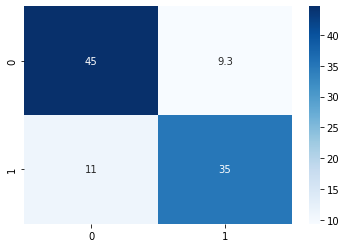

In [12]:
#confusion matrix

conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap((conf_matrix/np.sum(conf_matrix))*100,annot = True,cmap = 'Blues')

## Logistic Regression

In [13]:
LR_model = LogisticRegression()
LR_model.fit(x_train,y_train)

pred_LR = pd.DataFrame(LR_model.predict(x_test))

score_LR = LR_model.score(x_test,y_test)
print('LogisticRegression Accuracy :', '{:.1%}'.format(score_LR),'\n')
print(classification_report(y_test,pred_LR))

LogisticRegression Accuracy : 78.0% 

              precision    recall  f1-score   support

       False       0.80      0.79      0.80       162
        True       0.76      0.77      0.76       138

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



## RandomForest Classifier

In [103]:
model_RF =RandomForestClassifier(Random_state=42)
model_RF.fit(x_train,y_train)

pred_RF = pd.DataFrame(model_RF.predict(x_test))

score_RF = model_RF.score(x_test,y_test)
print('Random Forest Classifier Accuracy : ','{:.1%}'.format(score_RF),'\n')
print(classification_report(y_test,pred_RF))

TypeError: __init__() got an unexpected keyword argument 'Random_state'

# Imputation of  the Missing Values 

In [15]:
#The iterativeimputer is used to fill the missing values
#IterativeImputer class, which models each feature with
    #missing values as a function of other features, and uses that estimate for imputation.

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer()
imp_data_array = imp.fit_transform(in_data)

#Converting to Pandas DataFrame

df_imp_data = pd.DataFrame(imp_data_array)
df_imp_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,30.0,186.88,-21.06,-17.68,14.20,563.22,-3.29,-5.32,-18.90,9.20,-9.44,10.89,-8.54,510.0,6.834660,0.0
1,30.0,196.88,-22.89,-19.38,19.70,353.22,-5.71,-1.48,-18.33,7.15,-8.58,15.89,-8.44,760.0,7.220000,0.0
2,30.0,96.88,-19.65,-16.46,17.30,398.22,-5.19,-1.96,-14.64,7.10,-9.18,20.89,-8.79,610.0,7.690000,0.0
3,3.0,216.88,-33.24,-27.80,0.84,344.22,-0.86,-6.89,-14.73,0.09,-17.98,7.89,-3.78,32.0,7.551266,0.0
4,3.0,198.88,-32.52,-26.26,1.52,278.22,0.08,-7.73,-13.62,1.91,-23.94,7.89,-3.25,36.0,8.678495,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,30.0,266.88,-18.69,-17.30,14.70,383.22,-4.94,-3.05,-9.78,5.95,-14.20,20.89,-9.29,110.0,9.380000,1.0
1496,30.0,206.88,-22.35,-18.00,12.30,428.22,-3.27,-3.48,-8.46,9.20,-11.56,30.89,-8.44,260.0,6.520000,0.0
1497,30.0,106.88,-17.91,-17.48,13.50,623.22,-5.96,-2.59,-13.89,9.40,-7.06,20.89,-11.79,370.0,8.726301,1.0
1498,30.0,336.88,-23.73,-18.68,17.60,503.22,-5.01,-3.72,-7.98,6.50,-8.60,30.89,-8.04,250.0,7.521166,0.0


In [16]:
#checking for missing values

df_imp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
 7   7       1500 non-null   float64
 8   8       1500 non-null   float64
 9   9       1500 non-null   float64
 10  10      1500 non-null   float64
 11  11      1500 non-null   float64
 12  12      1500 non-null   float64
 13  13      1500 non-null   float64
 14  14      1500 non-null   float64
 15  15      1500 non-null   float64
dtypes: float64(16)
memory usage: 187.6 KB


In [118]:
#spliting the train ,test data 
#RandomForestClassifier is used to build the models,since it gave the maximun accuracy on un-imputed dataset

X =df_imp_data.iloc[:,:15]
Y =df_imp_data.iloc[:,15]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state =42)

model_IMP = RandomForestClassifier()
model_IMP.fit(X_train,Y_train)

pred_IMP = pd.DataFrame(model_IMP.predict(X_test))

score_IMP = model_IMP.score(X_test,Y_test)
print('RandomForest Classifier Accuracy on imputed dataset :','{:.1%}'.format(score_IMP),'\n')
print(classification_report(Y_test,pred_IMP))

RandomForest Classifier Accuracy on imputed dataset : 94.7% 

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       162
         1.0       0.94      0.94      0.94       138

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [112]:
#DecisionTreeClassifier() on imputed dataset

model_IMP1 = DecisionTreeClassifier()
model_IMP1.fit(X_train,Y_train)

pred_IMP1 = pd.DataFrame(model_IMP1.predict(X_test))

score_IMP1 = model_IMP1.score(X_test,Y_test)
print(' DecisionTree Classifier Accuracy on imputed dataset :','{:.1%}'.format(score_IMP1),'\n')
print(classification_report(Y_test,pred_IMP1))

 DecisionTree Classifier Accuracy on imputed dataset : 92.0% 

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       162
         1.0       0.91      0.91      0.91       138

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [106]:
#LogisticRegression() on imputed dataset

model_IMP2 = LogisticRegression()
model_IMP2.fit(X_train,Y_train)

pred_IMP2 = pd.DataFrame(model_IMP2.predict(X_test))

score_IMP2 = model_IMP2.score(X_test,Y_test)
print('LogisticRegression Accuracy on imputed dataset :','{:.1%}'.format(score_IMP2),'\n')
print(classification_report(Y_test,pred_IMP2))

LogisticRegression Accuracy on imputed dataset : 91.0% 

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       162
         1.0       0.90      0.91      0.90       138

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



<AxesSubplot:>

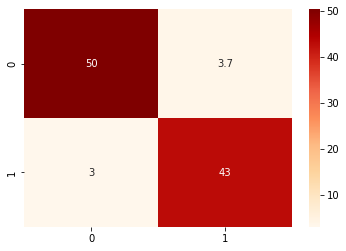

In [20]:
#confusion matrix of Decision tree classifer on the imputed model
conf_matrix_IMP = confusion_matrix(Y_test,pred_IMP1)
sns.heatmap((conf_matrix_IMP/(np.sum(conf_matrix_IMP)))*100,annot = True,cmap = 'OrRd')

# Comparative Study

On the dataset with out filling the missing values the randomforest classifier has the max accuracy(85.7%) compared to DecisionTreeClassifier(79%) and LogisticRegression(78%).
The iterative imputation is used to fill the missing values of F15 feature ,the model which is trained using imputed dataset has the max accuracy(95%)

# Prediction on a Hold-out Test Set

In [93]:
#loading the test dataset

test_set = pd.read_csv(r"C:\Users\renji\OneDrive\Desktop\Studies\ML\ML assignment\CE802_P2_Data\CE802_P2_Test.csv")
test_set

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,0,196.88,-39.51,-24.76,1.80,284.22,-0.26,-9.05,-20.55,1.17,-22.02,7.89,-3.38,2,NaN,NaN
1,3,196.88,-31.74,-31.54,1.48,368.22,-0.90,-6.35,-12.63,1.64,-18.34,7.89,-3.77,10,8.81,NaN
2,3,160.88,-33.09,-25.76,1.74,329.22,1.45,-6.55,-18.33,1.30,-19.48,7.89,-3.51,98,NaN,NaN
3,30,206.88,-20.19,-24.48,13.50,563.22,-3.24,-2.30,-13.56,5.50,-8.58,30.89,-9.49,270,NaN,NaN
4,3,218.88,-33.51,-33.38,0.68,263.22,1.41,-6.80,-22.26,1.01,-22.90,7.89,-3.56,106,7.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,30,26.88,-29.04,-21.62,10.60,758.22,-2.31,-4.86,-13.95,6.80,-15.76,20.89,-8.29,120,NaN,NaN
1496,0,202.88,-37.32,-25.78,0.36,371.22,2.04,-9.52,-16.05,1.17,-26.78,7.89,-3.70,24,7.77,NaN
1497,30,16.88,-27.69,-23.38,10.50,683.22,-2.46,-3.86,-21.75,8.40,-12.52,10.89,-8.39,160,7.16,NaN
1498,0,174.88,-35.70,-25.64,1.76,239.22,-0.64,-7.08,-12.57,1.70,-17.44,7.89,-3.29,40,NaN,NaN


In [94]:
#filling the missing values

test_imp = IterativeImputer()
imp_test_array = imp.fit_transform(test_set)

#Converting to Pandas DataFrame

df_imp_test = pd.DataFrame(imp_test_array)
df_imp_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,196.88,-39.51,-24.76,1.80,284.22,-0.26,-9.05,-20.55,1.17,-22.02,7.89,-3.38,2.0,8.978488
1,3.0,196.88,-31.74,-31.54,1.48,368.22,-0.90,-6.35,-12.63,1.64,-18.34,7.89,-3.77,10.0,8.810000
2,3.0,160.88,-33.09,-25.76,1.74,329.22,1.45,-6.55,-18.33,1.30,-19.48,7.89,-3.51,98.0,8.095471
3,30.0,206.88,-20.19,-24.48,13.50,563.22,-3.24,-2.30,-13.56,5.50,-8.58,30.89,-9.49,270.0,7.717447
4,3.0,218.88,-33.51,-33.38,0.68,263.22,1.41,-6.80,-22.26,1.01,-22.90,7.89,-3.56,106.0,7.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,30.0,26.88,-29.04,-21.62,10.60,758.22,-2.31,-4.86,-13.95,6.80,-15.76,20.89,-8.29,120.0,6.402392
1496,0.0,202.88,-37.32,-25.78,0.36,371.22,2.04,-9.52,-16.05,1.17,-26.78,7.89,-3.70,24.0,7.770000
1497,30.0,16.88,-27.69,-23.38,10.50,683.22,-2.46,-3.86,-21.75,8.40,-12.52,10.89,-8.39,160.0,7.160000
1498,0.0,174.88,-35.70,-25.64,1.76,239.22,-0.64,-7.08,-12.57,1.70,-17.44,7.89,-3.29,40.0,8.872419


In [95]:
#features used to predict the class
X_testset =df_imp_test.iloc[:,:]

In [96]:
#predicting the output class using RandomForestClassifier model
pred_IMP_testset = pd.DataFrame(model_IMP.predict(X_testset))
#pred_IMP_testset



In [97]:
#Adding the predicted values to the class coloumn in the test dataset
test_set.iloc[:,-1]= pred_IMP_testset
test_set

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,0,196.88,-39.51,-24.76,1.80,284.22,-0.26,-9.05,-20.55,1.17,-22.02,7.89,-3.38,2,NaN,1.0
1,3,196.88,-31.74,-31.54,1.48,368.22,-0.90,-6.35,-12.63,1.64,-18.34,7.89,-3.77,10,8.81,1.0
2,3,160.88,-33.09,-25.76,1.74,329.22,1.45,-6.55,-18.33,1.30,-19.48,7.89,-3.51,98,NaN,1.0
3,30,206.88,-20.19,-24.48,13.50,563.22,-3.24,-2.30,-13.56,5.50,-8.58,30.89,-9.49,270,NaN,0.0
4,3,218.88,-33.51,-33.38,0.68,263.22,1.41,-6.80,-22.26,1.01,-22.90,7.89,-3.56,106,7.28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,30,26.88,-29.04,-21.62,10.60,758.22,-2.31,-4.86,-13.95,6.80,-15.76,20.89,-8.29,120,NaN,0.0
1496,0,202.88,-37.32,-25.78,0.36,371.22,2.04,-9.52,-16.05,1.17,-26.78,7.89,-3.70,24,7.77,0.0
1497,30,16.88,-27.69,-23.38,10.50,683.22,-2.46,-3.86,-21.75,8.40,-12.52,10.89,-8.39,160,7.16,0.0
1498,0,174.88,-35.70,-25.64,1.76,239.22,-0.64,-7.08,-12.57,1.70,-17.44,7.89,-3.29,40,NaN,1.0


In [98]:
test_set.loc[test_set["Class"] == 0, "Class"] = 'False'
test_set.loc[test_set["Class"] == 1, "Class"] = 'True'
test_set

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,0,196.88,-39.51,-24.76,1.80,284.22,-0.26,-9.05,-20.55,1.17,-22.02,7.89,-3.38,2,NaN,True
1,3,196.88,-31.74,-31.54,1.48,368.22,-0.90,-6.35,-12.63,1.64,-18.34,7.89,-3.77,10,8.81,True
2,3,160.88,-33.09,-25.76,1.74,329.22,1.45,-6.55,-18.33,1.30,-19.48,7.89,-3.51,98,NaN,True
3,30,206.88,-20.19,-24.48,13.50,563.22,-3.24,-2.30,-13.56,5.50,-8.58,30.89,-9.49,270,NaN,False
4,3,218.88,-33.51,-33.38,0.68,263.22,1.41,-6.80,-22.26,1.01,-22.90,7.89,-3.56,106,7.28,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,30,26.88,-29.04,-21.62,10.60,758.22,-2.31,-4.86,-13.95,6.80,-15.76,20.89,-8.29,120,NaN,False
1496,0,202.88,-37.32,-25.78,0.36,371.22,2.04,-9.52,-16.05,1.17,-26.78,7.89,-3.70,24,7.77,False
1497,30,16.88,-27.69,-23.38,10.50,683.22,-2.46,-3.86,-21.75,8.40,-12.52,10.89,-8.39,160,7.16,False
1498,0,174.88,-35.70,-25.64,1.76,239.22,-0.64,-7.08,-12.57,1.70,-17.44,7.89,-3.29,40,NaN,True


In [100]:
#saving the outputdata in csv format
test_set.to_csv('CE802_P2_Test1.csv ',index = False)
assert pd.read_csv('CE802_P2_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P2_Test1.csv').iloc[:,:-1])